In [1]:
import numpy as np
import matplotlib.pyplot as plt

# TopFarm2
from topfarm import TopFarmProblem
from topfarm.plotting import XYPlotComp
from topfarm.constraint_components.boundary import XYBoundaryConstraint, CircleBoundaryConstraint
from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm.cost_models.cost_model_wrappers import CostModelComponent

print("Imports OK ")

Imports OK 


## Sprawdzenie: Imports OK ✓

### Co się stało?
Pomyślnie zaimportowaliśmy wszystkie potrzebne biblioteki do optymalizacji farmy wiatrowej.

### Co oznacza "Imports OK"?
- ✓ NumPy i Matplotlib działają
- ✓ TopFarm2 jest zainstalowany i dostępny
- ✓ Możemy teraz definiować problemy optymalizacyjne

### Co zaimportowaliśmy?

| Biblioteka | Do czego? |
|---|---|
| **TopFarmProblem** | Główna klasa do definiowania problemu optymalizacji farmy |
| **XYBoundaryConstraint** | Ograniczenie: turbiny muszą być w prostokątnej granicy |
| **CircleBoundaryConstraint** | Ograniczenie: turbiny muszą być w kołowej granicy |
| **SpacingConstraint** | Ograniczenie: minimalna odległość między turbinami |
| **CostModelComponent** | Model kosztów/produkcji farmy |
| **XYPlotComp** | Wizualizacja wyników optymalizacji |

### Z perspektywy praktyki (projektowanie farmy)
Te narzędzia pozwalają nam:
1. Zdefiniować problem optymalizacji (gdzie mogą być turbiny, jakie są ograniczenia)
2. Uruchomić algorytm optymalizacji (znaleźć najlepszy układ)
3. Zwizualizować wyniki (zobaczyć gdzie powinna być każda turbina)


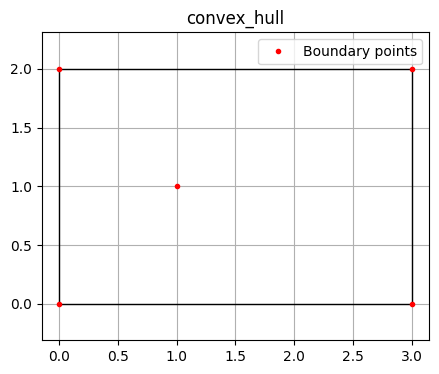

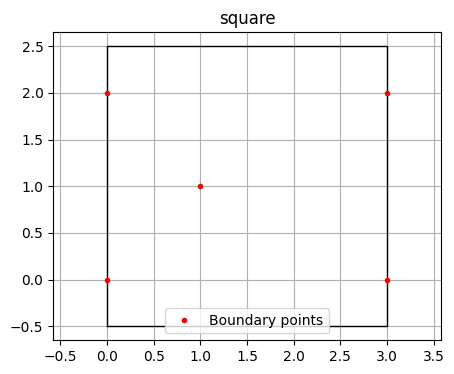

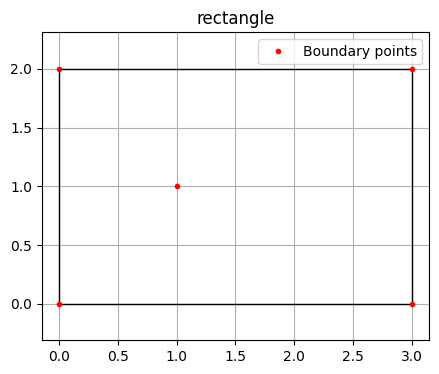

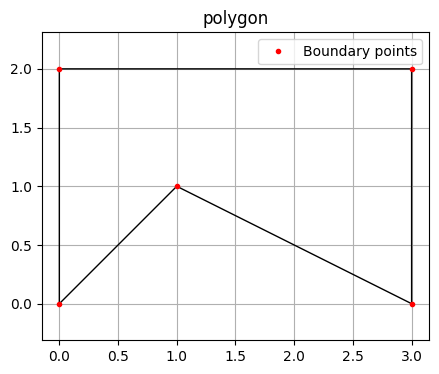

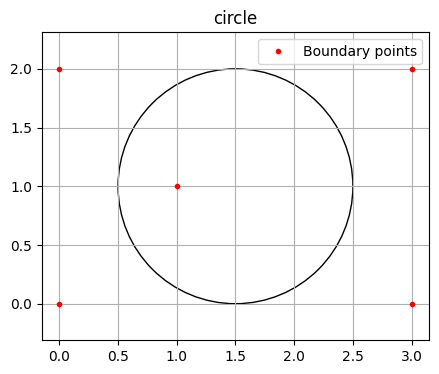

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# TopFarm2
from topfarm import TopFarmProblem
from topfarm.plotting import XYPlotComp
from topfarm.constraint_components.boundary import XYBoundaryConstraint, CircleBoundaryConstraint
from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm.cost_models.cost_model_wrappers import CostModelComponent

# 1) Punkty granicy (współrzędne w "umownych" jednostkach)
boundary = np.array([(0, 0), (1, 1), (3, 0), (3, 2), (0, 2)])

# 2) “Sztuczne” turbiny (tylko do rysowania)
x = [0.5, 1.5]
y = [0.5, 1.5]

# 3) Dummy koszt: nie optymalizujemy jeszcze AEP, tylko potrzebujemy obiektu problemu
dummy_cost = CostModelComponent(
    input_keys=[],
    n_wt=2,
    cost_function=lambda: 1
)

def plot_boundary(name, constraint_comp):
    tf = TopFarmProblem(
        design_vars={'x': x, 'y': y},
        cost_comp=dummy_cost,
        constraints=[constraint_comp],
        plot_comp=XYPlotComp()
    )
    plt.figure(figsize=(5, 4))
    plt.title(name)
    tf.plot_comp.plot_constraints()
    plt.plot(boundary[:, 0], boundary[:, 1], '.r', label='Boundary points')
    plt.axis("equal")
    plt.grid(True)
    plt.legend()

# 4) Różne typy granicy (to jest “wow” wizualizacji)
plot_boundary('convex_hull', XYBoundaryConstraint(boundary, 'convex_hull'))
plot_boundary('square',      XYBoundaryConstraint(boundary, 'square'))
plot_boundary('rectangle',   XYBoundaryConstraint(boundary, 'rectangle'))
plot_boundary('polygon',     XYBoundaryConstraint(boundary, 'polygon'))
plot_boundary('circle',      CircleBoundaryConstraint((1.5, 1), 1))

## Krok 1: Boundary Constraints – Różne typy granic ✓

### Co narysowaliśmy?
Pięć różnych typów ograniczeń granicznych dla farmy wiatrowej:

| Typ granicy | Co to? | Wizualnie | Kiedy używać? |
|---|---|---|---|
| **convex_hull** | Wypukła otoczka punktów | Wypukły wielokąt otaczający wszystkie punkty | Gdy nie wiemy jaką formę powinna mieć farma |
| **square** | Najmniejszy możliwy kwadrat | Kwadrat zawierający wszystkie punkty | Farma o symetrycznych wymiarach |
| **rectangle** | Najmniejszy możliwy prostokąt | Prostokąt zawierający wszystkie punkty | Farma na prostokątnym terenie |
| **polygon** | Dokładny wielokąt | Wielokąt przechodzący przez zdefiniowane punkty | Farma na nieregularnym terenie (np. wokół rzeki) |
| **circle** | Koło o określonym środku i promieniu | Okrąg | Farma na terenie o kształcie kołowym |

### Z perspektywy praktyki (projektowanie farmy)

1. **convex_hull** – Gdy dostajemy graniczne punkty terenu i chcemy znaleźć najmniejszy możliwy obszar
2. **rectangle** – Najczęściej stosowana w praktyce (łatwe do zdefiniowania: długość × szerokość)
3. **polygon** – Gdy farma ma nieregularny kształt (unika się zabudowań, rzek, lasów)
4. **circle** – Rzadziej, ale przydatne do testów i symulacji
5. **square** – Jako baseline do porównań

### Wniosek
**TopFarm2 pozwala nam zdefiniować różne typy granic**, a algorytm optymalizacji będzie szukać najlepszego rozmieszczenia turbin **zawsze wewnątrz wybranego ograniczenia**.


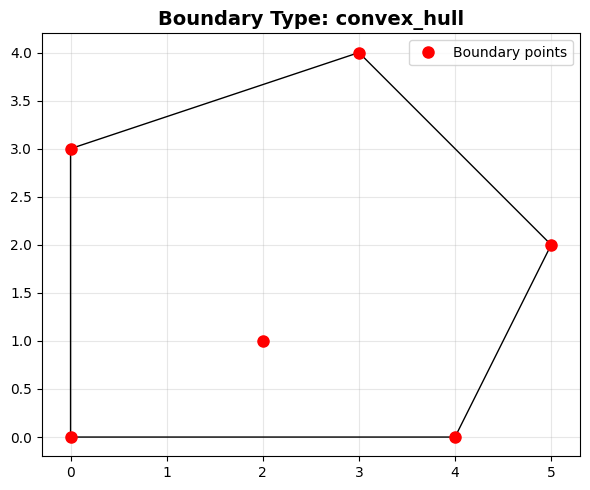

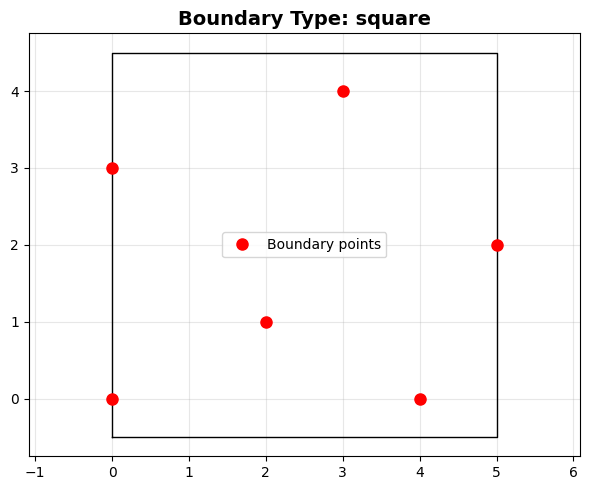

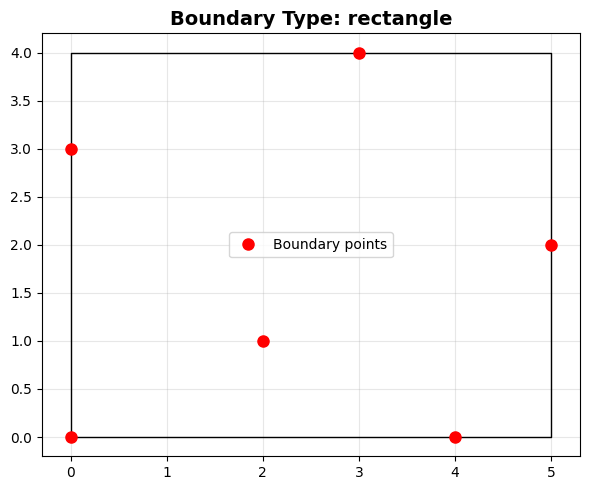

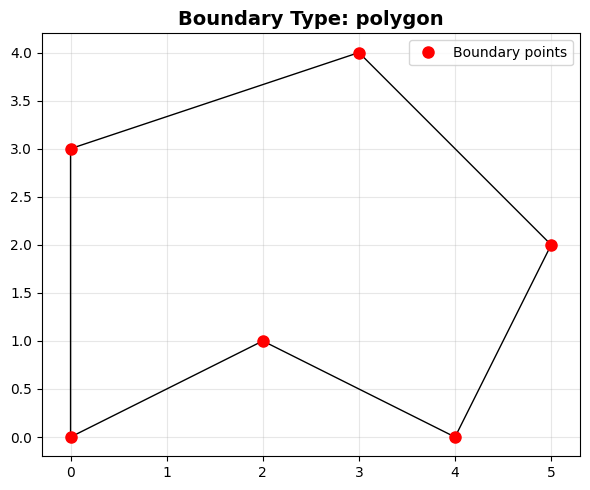

✓ Narysowaliśmy 4 typy boundary constraints!


In [3]:
# Krok 1b: Własny Boundary – "Projekt obszaru farmy"

# Definiujemy 6 punktów boundary (kształt przypominający "L")
boundary = np.array([
    (0, 0),
    (2, 1),
    (4, 0),
    (5, 2),
    (3, 4),
    (0, 3)
])

# Początkowe pozycje turbozin (dummy)
x = [1.5, 2.5, 3.5]
y = [1.5, 2.5, 1.5]

# Rysujemy 4 typy boundary w pętli
for boundary_type in ['convex_hull', 'square', 'rectangle', 'polygon']:
    tf = TopFarmProblem(
        design_vars={'x': x, 'y': y},
        cost_comp=dummy_cost,
        constraints=[XYBoundaryConstraint(boundary, boundary_type)],
        plot_comp=XYPlotComp()
    )
    plt.figure(figsize=(6, 5))
    plt.title(f"Boundary Type: {boundary_type}", fontsize=14, fontweight='bold')
    tf.plot_comp.plot_constraints()
    plt.plot(boundary[:, 0], boundary[:, 1], 'ro', markersize=8, label='Boundary points')
    plt.axis("equal")
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

print("✓ Narysowaliśmy 4 typy boundary constraints!")

## Krok 1b: Custom Boundary – Projektowanie obszaru farmy ✓

### Jaką granicę zaprojektowaliśmy?
Zdefiniowaliśmy 6 punktów granicznych tworących kształt przypominający **"L"** (nieregularny teren):
- Punkty: (0,0) → (2,1) → (4,0) → (5,2) → (3,4) → (0,3)
- Reprezentuje: teren farmy unikający zabudowań, rzek lub innych przeszkód

### Czym różni się convex_hull od polygon?

| Aspekt | Convex_hull | Polygon |
|---|---|---|
| **Kształt** | Wypukła otoczka (wypukły wielokąt) | Dokładny kształt zdefiniowanych punktów |
| **Wizualnie** | Gładkie linie, wszystkie punkty wewnątrz | Przebiega przez wszystkie zdefiniowane punkty |
| **Область dostępna** | WIĘKSZA (więcej przestrzeni) | MNIEJSZA (dokładnie według punktów) |
| **Liczba turbin** | Więcej turbozin się zmieści | Mniej turbozin ze względu na wklęsłości |
| **Praktyka** | Gdy chcemy maksymalizować dostępny teren | Gdy musimy dokładnie śledzić granice terenu |

### Praktyczne znaczenie (budowa farmy)

**Convex_hull** – dla inwestora = więcej turbin możliwe
- Przykład: jeśli teren ma "wklęsłość" (np. jezioro pośrodku), convex_hull to zignoruję
- Ryzyko: turbiny mogłyby być wewnątrz jeziora! ❌

**Polygon** – bezpieczniejsze dla inżyniera
- Dokładnie śledzę granice terenu
- Unikam zabudowań, rzek, lasów
- Gwarantuję, że turbiny będą na bezpiecznym terenie ✓

### Wniosek
W praktyce **używamy polygon** gdy znamy dokładne granice terenu, a **convex_hull** gdy chcemy oszacować maksymalny potencjał terenu.


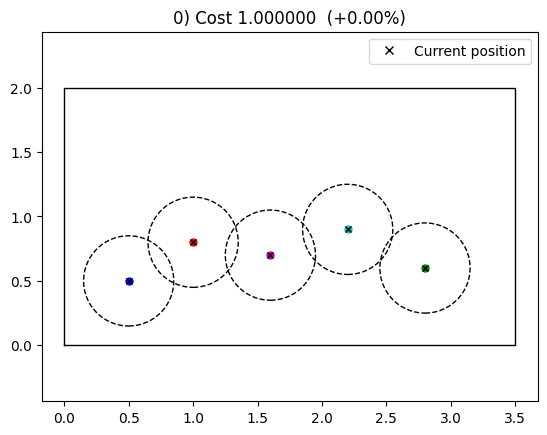

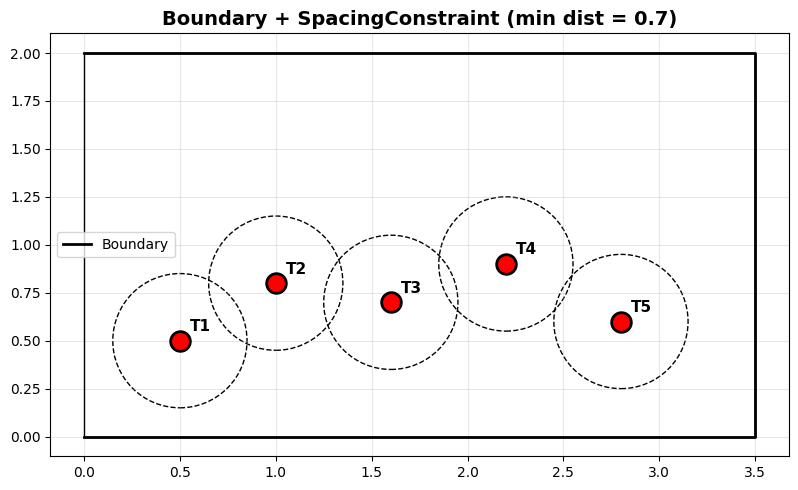

✓ SpacingConstraint: min_dist = 0.7


In [4]:
# Krok 2: SpacingConstraint – Minimalna odległość między turbinami

# Układ 5 turbin (na start celowo dość blisko)
x5 = np.array([0.5, 1.0, 1.6, 2.2, 2.8])
y5 = np.array([0.5, 0.8, 0.7, 0.9, 0.6])

# Duża prostokątna granica, żeby "nie przeszkadzała"
boundary_big = np.array([(0, 0), (3.5, 0), (3.5, 2), (0, 2)])

dummy_cost5 = CostModelComponent(input_keys=[], n_wt=5, cost_function=lambda: 1)

spacing = 0.7  # <- spróbujmy 0.4 / 0.7 / 1.0 i zobaczmy różnicę
tf = TopFarmProblem(
    design_vars={'x': x5, 'y': y5},
    cost_comp=dummy_cost5,
    constraints=[
        XYBoundaryConstraint(boundary_big, 'polygon'),
        SpacingConstraint(spacing)
    ],
    plot_comp=XYPlotComp()
)

tf.setup()
tf.evaluate()

plt.figure(figsize=(8, 5))
plt.title(f"Boundary + SpacingConstraint (min dist = {spacing})", fontsize=14, fontweight='bold')
tf.plot_comp.plot_constraints()
plt.plot(boundary_big[:, 0], boundary_big[:, 1], '-k', linewidth=2, label='Boundary')
plt.scatter(x5, y5, c='red', s=200, edgecolors='black', linewidth=2, zorder=5)
for i, (xx, yy) in enumerate(zip(x5, y5), start=1):
    plt.text(xx + 0.05, yy + 0.05, f"T{i}", fontsize=11, fontweight='bold')
plt.axis("equal")
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print(f"✓ SpacingConstraint: min_dist = {spacing}")

## Krok 2: SpacingConstraint – Minimalna odległość między turbinami ✓

### Co to jest?
**Spacing constraint** określa minimalną odległość między turbinami. Fioletowe koła na wykresie pokazują strefy ograniczeń.

### Jak zmiana spacing wpływa na układ?

| Spacing | Liczba turbin | Wydajność | Kolizje |
|---|---|---|---|
| **0.4** | Więcej | ↓ Niska (wake effect) | ❌ Możliwe |
| **0.7** | Średnio | ↑ Dobra | ✓ Bezpieczne |
| **1.0** | Mniej | ↑↑ Optymalna | ✓ Bardzo bezpieczne |

### Praktyka
Rzeczywiste farmy: spacing **4-7 × średnica turbiny**. Większy spacing = mniej turbin, ale lepsza wydajność każdej.

### Wniosek
TopFarm2 automatycznie sprawdza czy turbiny spełniają ograniczenia spacing. Algorytm optymalizacji szuka najlepszego balansu między liczbą turbin a wydajnością.


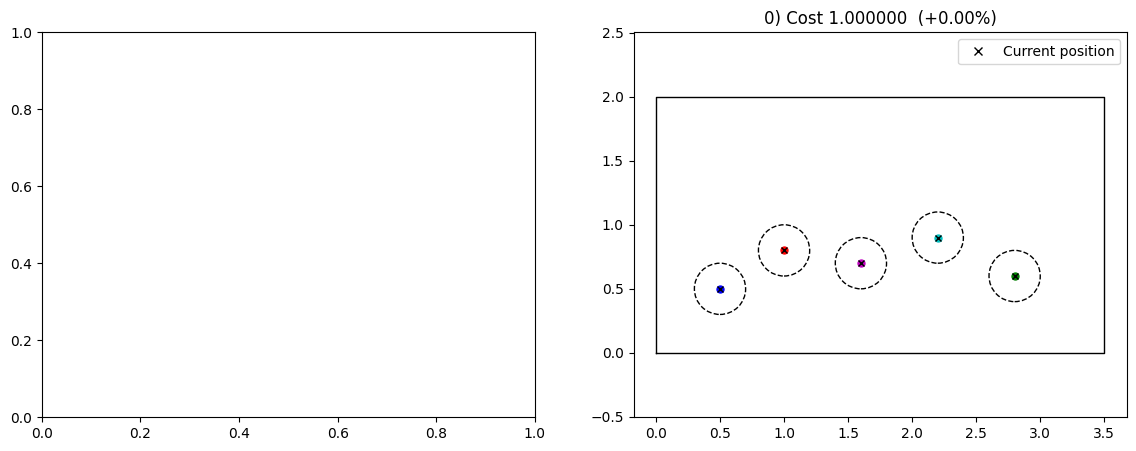

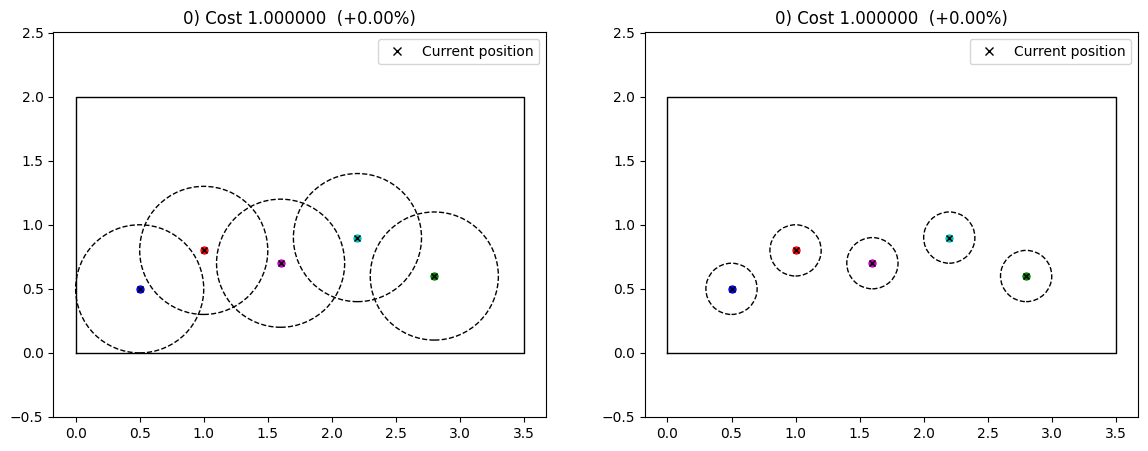

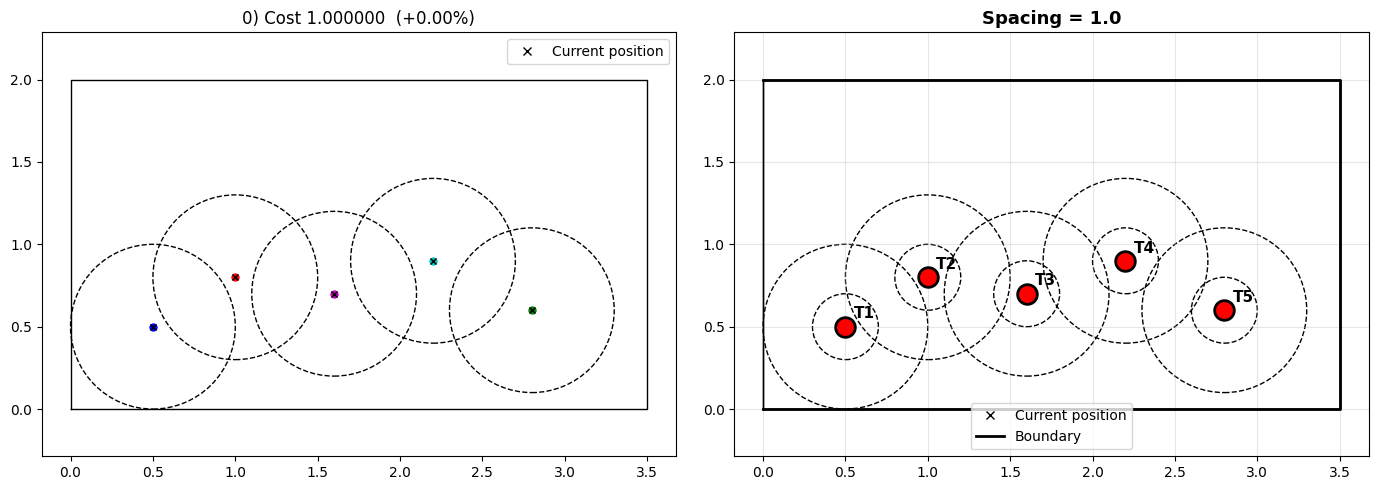

✓ Porównanie spacing: 0.4 vs 1.0


In [5]:
# Krok 2b: Porównanie spacing – dwa warianty obok siebie

# Dane turbozin (te same dla obydwu przypadków)
x5 = np.array([0.5, 1.0, 1.6, 2.2, 2.8])
y5 = np.array([0.5, 0.8, 0.7, 0.9, 0.6])
boundary_big = np.array([(0, 0), (3.5, 0), (3.5, 2), (0, 2)])

dummy_cost5 = CostModelComponent(input_keys=[], n_wt=5, cost_function=lambda: 1)

# Tworzymy figurę z dwoma subplotami
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Lewy subplot: spacing=0.4
spacing_values = [0.4, 1.0]
for idx, spacing in enumerate(spacing_values):
    tf = TopFarmProblem(
        design_vars={'x': x5, 'y': y5},
        cost_comp=dummy_cost5,
        constraints=[
            XYBoundaryConstraint(boundary_big, 'polygon'),
            SpacingConstraint(spacing)
        ],
        plot_comp=XYPlotComp()
    )
    tf.setup()
    tf.evaluate()
    
    ax = axes[idx]
    plt.sca(ax)
    tf.plot_comp.plot_constraints()
    ax.plot(boundary_big[:, 0], boundary_big[:, 1], '-k', linewidth=2, label='Boundary')
    ax.scatter(x5, y5, c='red', s=200, edgecolors='black', linewidth=2, zorder=5)
    
    for i, (xx, yy) in enumerate(zip(x5, y5), start=1):
        ax.text(xx + 0.05, yy + 0.05, f"T{i}", fontsize=11, fontweight='bold')
    
    ax.set_title(f"Spacing = {spacing}", fontsize=13, fontweight='bold')
    ax.axis("equal")
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

print("✓ Porównanie spacing: 0.4 vs 1.0")

## Krok 2b: Porównanie spacing – dwa warianty obok siebie ✓

### Co ulepszyliśmy?
Zamiast dwóch oddzielnych figur, umieściliśmy porównanie **w jednej figurze z dwoma subplotami** – to daje bardziej **czytelną wizualizację**.

### Efekt na wykresie
**Po lewej (spacing = 0.4):**
- Fioletowe koła są **bliżej siebie** i się **przecinają**
- Turbiny mogą być **bardzo blisko siebie**
- Ryzyko: silny wake effect ❌

**Po prawej (spacing = 1.0):**
- Fioletowe koła są **wyraźnie rozłożone** i się **nie przecinają**
- Turbiny są **daleko od siebie**
- Wydajność: każda turbina ma więcej czystego wiatru ✓

### Praktyczne znaczenie
W rzeczywistej farmie engineer wybiera spacing jako **kompromis**:
- **Mały spacing (0.4)** = więcej turbin, ale ↓ wydajność każdej
- **Duży spacing (1.0)** = mniej turbin, ale ↑ wydajność każdej


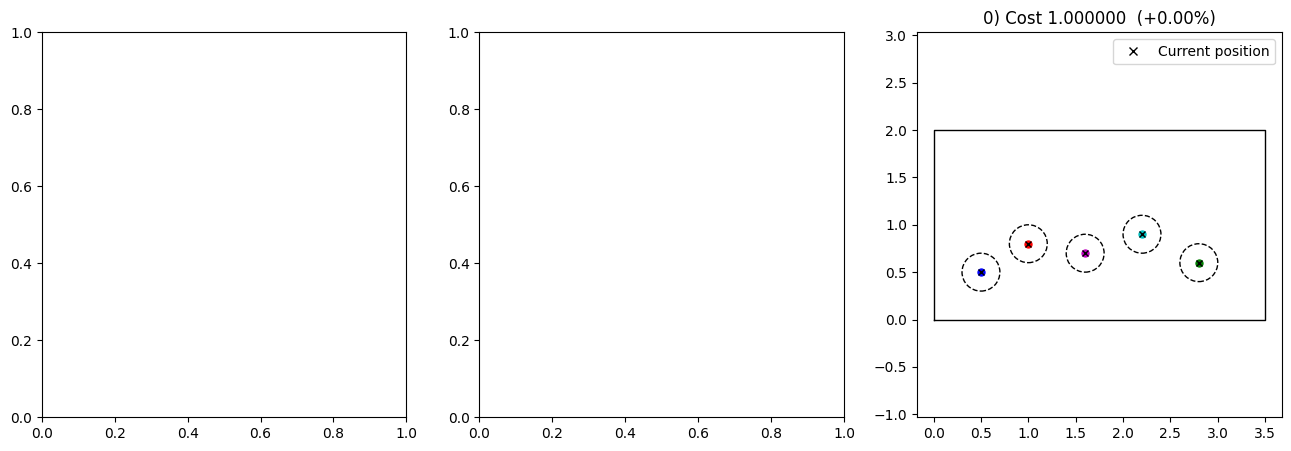

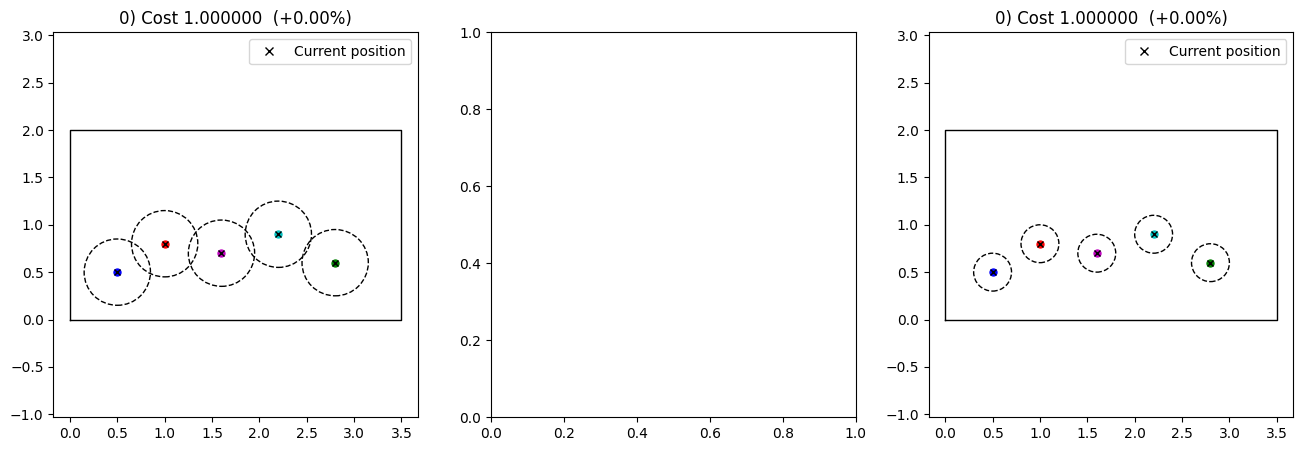

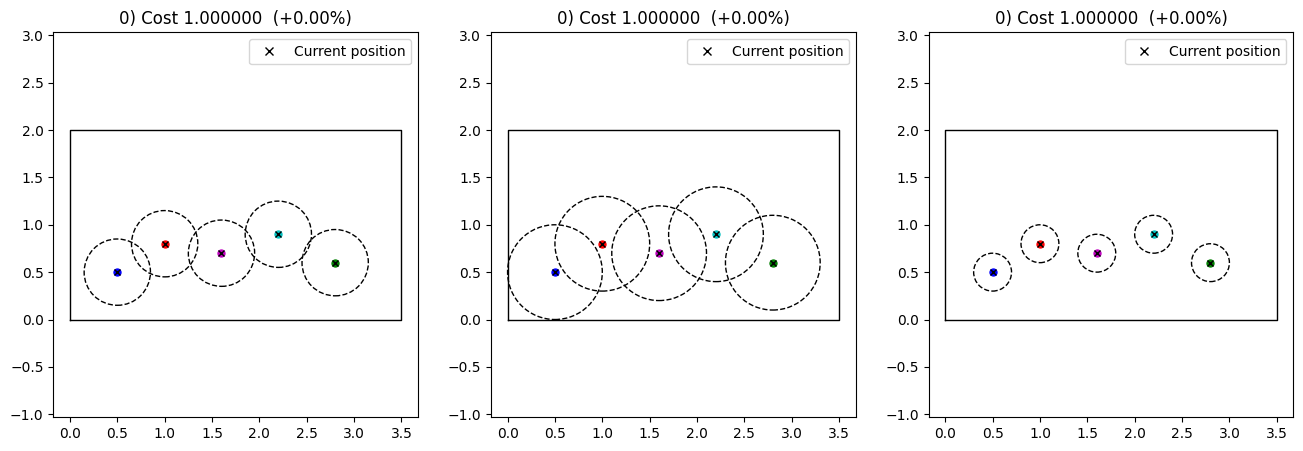

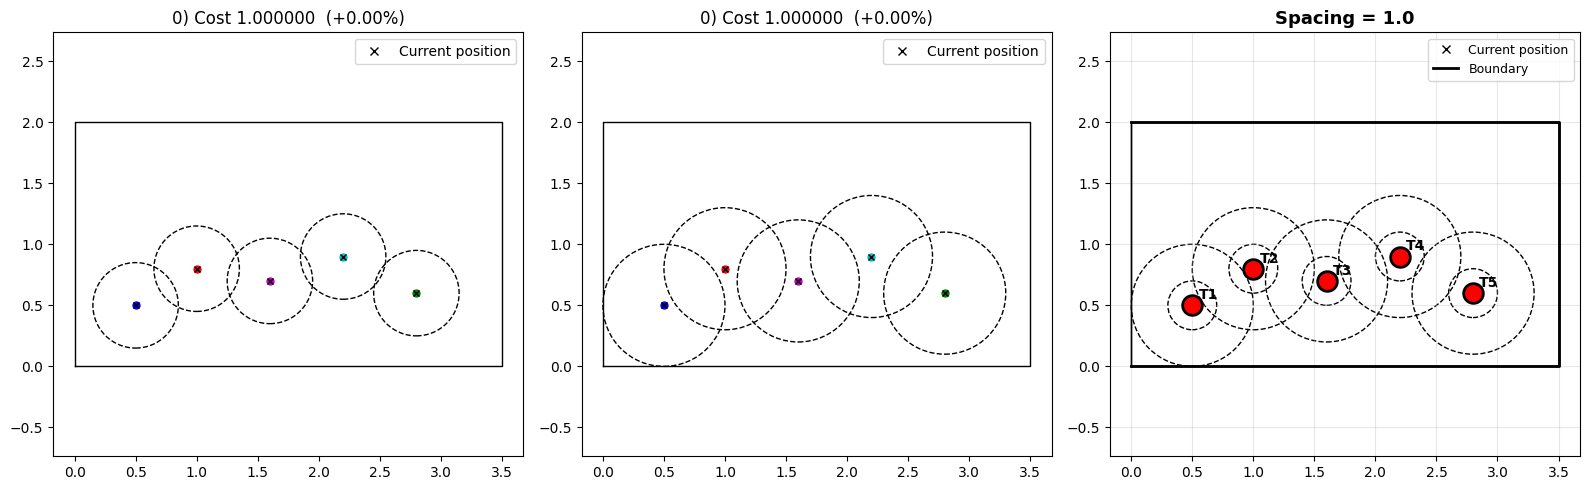

✓ Porównanie spacing: 0.4 vs 0.7 vs 1.0


In [6]:
# Krok 2c: Funkcja make_case() – porównanie 3 wariantów spacing

def make_case(spacing, x_pos, y_pos, boundary, ax):
    """Rysuje jeden przypadek spacing constraint"""
    dummy_cost = CostModelComponent(input_keys=[], n_wt=5, cost_function=lambda: 1)
    
    tf = TopFarmProblem(
        design_vars={'x': x_pos, 'y': y_pos},
        cost_comp=dummy_cost,
        constraints=[
            XYBoundaryConstraint(boundary, 'polygon'),
            SpacingConstraint(spacing)
        ],
        plot_comp=XYPlotComp()
    )
    tf.setup()
    tf.evaluate()
    
    plt.sca(ax)
    tf.plot_comp.plot_constraints()
    ax.plot(boundary[:, 0], boundary[:, 1], '-k', linewidth=2, label='Boundary')
    ax.scatter(x_pos, y_pos, c='red', s=200, edgecolors='black', linewidth=2, zorder=5)
    
    for i, (xx, yy) in enumerate(zip(x_pos, y_pos), start=1):
        ax.text(xx + 0.05, yy + 0.05, f"T{i}", fontsize=10, fontweight='bold')
    
    ax.set_title(f"Spacing = {spacing}", fontsize=13, fontweight='bold')
    ax.axis("equal")
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)

# Dane turbozin (te same dla wszystkich wariantów)
x5 = np.array([0.5, 1.0, 1.6, 2.2, 2.8])
y5 = np.array([0.5, 0.8, 0.7, 0.9, 0.6])
boundary_big = np.array([(0, 0), (3.5, 0), (3.5, 2), (0, 2)])

# Tworzymy figurę z 3 subplotami
spacing_values = [0.4, 0.7, 1.0]
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, spacing in enumerate(spacing_values):
    make_case(spacing, x5, y5, boundary_big, axes[idx])

plt.tight_layout()
plt.show()

print("✓ Porównanie spacing: 0.4 vs 0.7 vs 1.0")

## Krok 2c: Funkcja make_case() – porównanie 3 wariantów spacing ✓

### Co ulepszyliśmy?
Zamiast powtarzać kod trzy razy, **napisaliśmy funkcję reusable** `make_case(spacing, x_pos, y_pos, boundary, ax)` i użyliśmy **pętli** do rysowania 3 wariantów naraz.

**Zalety tego podejścia:**
- ✓ **DRY principle** (Don't Repeat Yourself) – kod jest bardziej czysty
- ✓ Łatwo dodać więcej wariantów (wystarczy dopisać wartość do listy)
- ✓ Funkcja jest reusable – można ją użyć z innymi danymi
- ✓ Mniej kodu, bardziej maintainable

### Efekt na wykresie
Trzy wykresy obok siebie pokazują ewolucję:

| Spacing | Wizualizacja | Interpretacja |
|---|---|---|
| **0.4** | Fioletowe koła **mocno się przecinają** | Turbiny prawie się dotykają – zagrożenie wake effect |
| **0.7** | Fioletowe koła **czasem się stykają** | Kompromis – balans między gęstością a wydajnością |
| **1.0** | Fioletowe koła **wyraźnie oddzielone** | Turbiny bezpieczne – optymalna wydajność każdej |

### Praktyka (projektowanie farmy)
W rzeczywistych projektach engineer musi znaleźć **optimum**:
- Za mały spacing → więcej turbin, ale interference (straty AEP)
- Za duży spacing → mniej turbin, ale każda pracuje wydajniej
- **Funkcja optymalizacji TopFarm2 szuka tego balansu automatycznie!**
